<a href="https://colab.research.google.com/github/daianebabicz/Trabalho-2---Chroma-Key/blob/main/Trabalho_2_Chroma_Key.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Importação das libs
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Carregando as imagens
formas = cv2.imread('/content/gdrive/MyDrive/Visão Computacional/Trabalho 02 - Chroma Key/Imagens/Formas/formas.bmp')
rainha = cv2.imread('/content/gdrive/MyDrive/Visão Computacional/Trabalho 02 - Chroma Key/Imagens/Rainha/rainha.bmp')
corvos = cv2.imread('/content/gdrive/MyDrive/Visão Computacional/Trabalho 02 - Chroma Key/Imagens/Corvos/corvos.bmp')
corvo = cv2.imread('/content/gdrive/MyDrive/Visão Computacional/Trabalho 02 - Chroma Key/Imagens/Corvo/corvo.bmp')
background = cv2.imread('/content/gdrive/MyDrive/Visão Computacional/Trabalho 02 - Chroma Key/Imagens/background.bmp')

In [ ]:
# Definindo as funções para aplicar os filtros
def apply_filters(img):
    # Extraindo a parte verde da imagem original
    lower_green = np.array([0, 50, 0])
    upper_green = np.array([80, 255, 80])
    mask = cv2.inRange(img, lower_green, upper_green)

    # Aplicando a máscara à imagem original
    masked_image = cv2.bitwise_and(img, img, mask=mask)

    # Aplicando o filtro Sobel na imagem segmentada
    sobelx = cv2.Sobel(masked_image, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(masked_image, cv2.CV_64F, 0, 1, ksize=5)
    sobel = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

    return sobel, mask

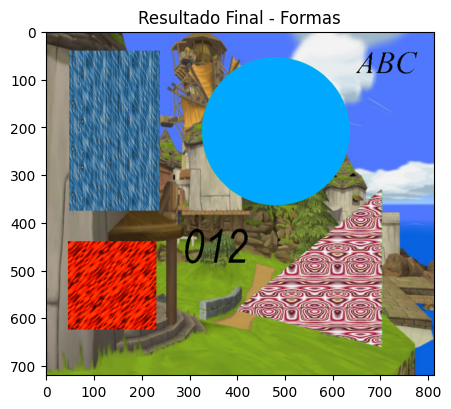

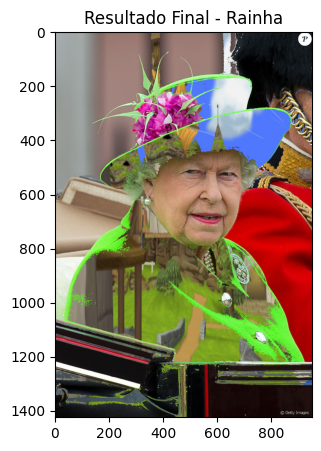

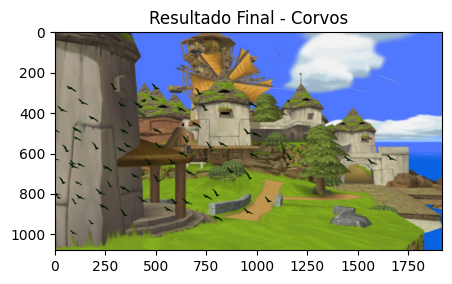

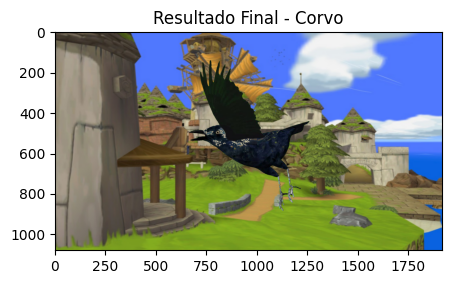

In [ ]:
# Processando cada imagem
for name, img in zip(['Formas', 'Rainha', 'Corvos', 'Corvo'], [formas, rainha, corvos, corvo]):
    # Aplicando os filtros
    sobel, mask = apply_filters(img)

    # Convertendo a imagem de fundo para o mesmo tamanho
    background_resized = cv2.resize(background, (img.shape[1], img.shape[0]))

    # Aplicando a máscara à imagem de fundo
    background_masked = cv2.bitwise_and(background_resized, background_resized, mask=mask)

    # Aplicando a máscara invertida à imagem original
    img_masked = cv2.bitwise_and(img, img, mask=cv2.bitwise_not(mask))

    # Combinando a imagem original mascarada e a imagem de fundo mascarada
    result = cv2.add(img_masked, background_masked)

    # Exibindo a imagem final
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title(f'Resultado Final - {name}')
    plt.show()
    
    # Salvando os resultados parciais

    cv2.imwrite(f'/content/gdrive/MyDrive/Visão Computacional/Trabalho 02 - Chroma Key/Imagens/{name}/{name}-binarizacao.png', mask)
    cv2.imwrite(f'/content/gdrive/MyDrive/Visão Computacional/Trabalho 02 - Chroma Key/Imagens/{name}/{name}-gauss.png', cv2.GaussianBlur(img, (5, 5), 0, 0))
    cv2.imwrite(f'/content/gdrive/MyDrive/Visão Computacional/Trabalho 02 - Chroma Key/Imagens/{name}/{name}-resultado.png', result)

